In [2]:
import numpy as np
import pandas as pd
import os
import json
import random
from datetime import datetime


In [5]:
json_filepaths = []
json_filepaths.append('/Users/ishan/Desktop/cs224n/02.json')
json_filepaths.append('/Users/ishan/Desktop/cs224n/07.json')

In [7]:
def extract_info(json_data):
    title = json_data.get("title", "")
    parts = title.split(",")
    if len(parts) >= 4:
        day_of_week = parts[1].strip()
        year = parts[3].strip()
    else:
        day_of_week = ""
        year = ""
    return year, day_of_week


In [12]:
data = []

for filepath in json_filepaths:
    with open(filepath, 'r') as f:
        json_data = json.load(f)
    year, day_of_week = extract_info(json_data)
    relative_filepath = os.path.relpath(filepath, "/Users/ishan")
    data.append([year, day_of_week, relative_filepath])
# get a df
df = pd.DataFrame(data, columns=["Year", "Day of the Week", "Filepath"])
print(df)

   Year Day of the Week                Filepath
0  1978             THU  Desktop/cs224n/02.json
1  1994          MONDAY  Desktop/cs224n/07.json


In [10]:
for string in df['Filepath']:
    str_list = string.split('/')
    str_list = str_list[3:]
    new_string


['Desktop', 'cs224n', '02.json']
['Desktop', 'cs224n', '07.json']


In [22]:
import os
import json
import pandas as pd

# same format so can just hardcode the 4 and 3 to get the title and day of the week
def extract_info(json_data):
    title = json_data.get("title", "")
    parts = title.split(",")
    if len(parts) >= 4:
        day_of_week = parts[1].strip()
        year = parts[3].strip()
    else:
        day_of_week = ""
        year = ""
    return year, day_of_week

# use base directory
base_dir = '/Users/ishan/Downloads/nyt_crosswords-master'

data = []

for year_dir in os.listdir(base_dir):
    year_path = os.path.join(base_dir, year_dir)
    if os.path.isdir(year_path):
        for month_dir in os.listdir(year_path):
            month_path = os.path.join(year_path, month_dir)
            if os.path.isdir(month_path):
                for file in os.listdir(month_path):
                    if file.endswith('.json'):
                        filepath = os.path.join(month_path, file)
                        try:
                            with open(filepath, 'r') as f:
                                json_data = json.load(f)                
                            year, day_of_week = extract_info(json_data)                
                            relative_filepath = os.path.relpath(filepath, base_dir)
                            data.append([year, day_of_week, relative_filepath])
                        except json.JSONDecodeError:
                            # skip all the stuff that doesn't work
                            print(f"Invalid JSON file: {filepath}")

df = pd.DataFrame(data, columns=["Year", "Day of the Week", "Filepath"])

df = df[df["Day of the Week"] != ""]

df.to_csv('crossword_info.csv', index=False)

print(df)

Invalid JSON file: /Users/ishan/Downloads/nyt_crosswords-master/2017/12/03.json
      Year Day of the Week         Filepath
1     2010             SAT  2010/03/20.json
2     2010             TUE  2010/03/16.json
3     2010             MON  2010/03/01.json
4     2010             WED  2010/03/17.json
6     2010             WED  2010/03/10.json
...    ...             ...              ...
6950  2004             THU  2004/12/02.json
6951  2004             TUE  2004/12/14.json
6952  2004             WED  2004/12/15.json
6953  2004             FRI  2004/12/03.json
6955  2004             THU  2004/12/23.json

[5957 rows x 3 columns]


In [23]:
# download
from IPython.display import FileLink

FileLink('crossword_info.csv')

/Users/ishan/Desktop/cs224n/crossword_info.csv

In [130]:
solutions_filepath = '/Users/ishan/Desktop/cs224n/solutions_dataset.csv'
accuracies_filepath = '/Users/ishan/Desktop/cs224n/accuracies.csv'

solutions_df = pd.read_csv(solutions_filepath)
accuracies_df = pd.read_csv(accuracies_filepath)

#solutions_df.head(10)
accuracies_df.head(10)


,Year,Day of the Week,Filepath,Letter,Word,PredictionPairs
0,1977,FRI,1977/10/14.json,0.673797,0.434211,"[('HITS', 'CIUM'), ('CISCO', 'CISRO'), ('ATTU'..."
1,1991,WED,1991/11/13.json,0.761905,0.525641,"[('ADAM', 'ADAO'), ('ALAS', 'ALAS'), ('ASSAD',..."
2,1977,THU,1977/03/24.json,0.712042,0.473684,"[('ADAM', 'ADAM'), ('PRESS', 'REASS'), ('MAST'..."
3,1991,FRI,1991/03/15.json,0.632432,0.378378,"[('BAGS', 'BOOT'), ('OPAL', 'OPAL'), ('TAVI', ..."
4,1997,WED,1997/03/26.json,0.748663,0.564103,"[('SALAD', 'SALAC'), ('COLE', 'COLE'), ('PAP',..."
5,2004,WED,2004/11/17.json,0.770053,0.512821,"[('WISH', 'WISH'), ('SCAMP', 'SCALA'), ('NCAA'..."
6,1999,TUE,1999/04/20.json,0.670270,0.461538,"[('GARB', 'SARO'), ('AWES', 'AWES'), ('YALTA',..."
7,2003,MON,2003/10/13.json,0.919786,0.769231,"[('SCAR', 'SCAR'), ('ACAD', 'ACAD'), ('BABAR',..."
8,2010,SAT,2010/06/12.json,0.409326,0.151515,"[('BEEFEATERS', 'AAEAEATEES'), ('FIRE', 'AYFM'..."
9,1990,SAT,1990/01/13.json,0.551020,0.283784,"[('PARADIDDLE', 'PSEADIRTAN'), ('CRIS', 'SFPS'..."


In [ ]:
for i in range(len(df.index)):
    row = df.iloc[i]
    print(row)

In [44]:
temp = (sum(accuracies_df['Letter']))

In [45]:
(temp + 6)  / 194

0.636435087187301

In [48]:
print(accuracies_df['Letter'].value_counts())

Letter
-1.000000    6
 0.711230    3
 0.666667    3
 0.761905    3
 0.677249    3
            ..
 0.770492    1
 0.484536    1
 0.810811    1
 0.645503    1
 0.528796    1
Name: count, Length: 172, dtype: int64


In [56]:
print(accuracies_df.iloc[0]['PredictionPairs'])


[('HITS', 'CIUM'), ('CISCO', 'CISRO'), ('ATTU', 'ATTU'), ('ECHO', 'LCMA'), ('ASTOR', 'ASTOR'), ('THUS', 'THEN'), ('PEEL', 'DEPR'), ('BLADE', 'BLTEE'), ('HENS', 'HENS'), ('SMOKIER', 'SAIKIER'), ('POSER', 'POSEL'), ('AMEN', 'LAEN'), ('ORMOLU', 'ORICHA'), ('CANONS', 'CANONS'), ('FOUL', 'SOFE'), ('NAG', 'CAR'), ('AMINO', 'IMAAO'), ('ABUSE', 'ABUSE'), ('ALL', 'OLL'), ('LENS', 'LENS'), ('CRETE', 'TRRTE'), ('CLIO', 'CLIO'), ('LST', 'LST'), ('TRITE', 'TRITE'), ('CASES', 'AAAEN'), ('ASH', 'ASH'), ('HASH', 'HESS'), ('MASONS', 'ECSANO'), ('ENAMEL', 'ENAMEL'), ('AVER', 'NOER'), ('DEMON', 'DEMON'), ('ENDEMIC', 'ANRPMAC'), ('ODOR', 'ODMR'), ('APHID', 'ENAIA'), ('ASHE', 'ASHE'), ('ENOS', 'ENTS'), ('IRENE', 'CFENG'), ('TEAL', 'TEAL'), ('SANE', 'SANE'), ('ROMAN', 'OCMAE'), ('ESPY', 'ESPY'), ('HEP', 'CLD'), ('ICES', 'ICES'), ('THEMANINTHEMOON', 'UMPALNANTHEMMTN'), ('SOLOMONS', 'MARIAOAS'), ('CABINS', 'CABINS'), ('ISLE', 'ISLE'), ('STAROFBETHLEHEM', 'STTROSBRTSLAAEM'), ('COD', 'ROE'), ('ORE', 'ORE'), ('A

In [69]:
import ast

In [70]:
prediction_pairs_first_row

"[('HITS', 'CIUM'), ('CISCO', 'CISRO'), ('ATTU', 'ATTU'), ('ECHO', 'LCMA'), ('ASTOR', 'ASTOR'), ('THUS', 'THEN'), ('PEEL', 'DEPR'), ('BLADE', 'BLTEE'), ('HENS', 'HENS'), ('SMOKIER', 'SAIKIER'), ('POSER', 'POSEL'), ('AMEN', 'LAEN'), ('ORMOLU', 'ORICHA'), ('CANONS', 'CANONS'), ('FOUL', 'SOFE'), ('NAG', 'CAR'), ('AMINO', 'IMAAO'), ('ABUSE', 'ABUSE'), ('ALL', 'OLL'), ('LENS', 'LENS'), ('CRETE', 'TRRTE'), ('CLIO', 'CLIO'), ('LST', 'LST'), ('TRITE', 'TRITE'), ('CASES', 'AAAEN'), ('ASH', 'ASH'), ('HASH', 'HESS'), ('MASONS', 'ECSANO'), ('ENAMEL', 'ENAMEL'), ('AVER', 'NOER'), ('DEMON', 'DEMON'), ('ENDEMIC', 'ANRPMAC'), ('ODOR', 'ODMR'), ('APHID', 'ENAIA'), ('ASHE', 'ASHE'), ('ENOS', 'ENTS'), ('IRENE', 'CFENG'), ('TEAL', 'TEAL'), ('SANE', 'SANE'), ('ROMAN', 'OCMAE'), ('ESPY', 'ESPY'), ('HEP', 'CLD'), ('ICES', 'ICES'), ('THEMANINTHEMOON', 'UMPALNANTHEMMTN'), ('SOLOMONS', 'MARIAOAS'), ('CABINS', 'CABINS'), ('ISLE', 'ISLE'), ('STAROFBETHLEHEM', 'STTROSBRTSLAAEM'), ('COD', 'ROE'), ('ORE', 'ORE'), ('

In [73]:
# first row test
prediction_pairs = ast.literal_eval(prediction_pairs_first_row)

def calculate_accuracy(pairs):
    correct_count = 0
    total_count = len(pairs)
    for pair in pairs:
        if len(pair) == 2:
            correct, generated = pair
            if correct == generated:
                correct_count += 1
    return correct_count / total_count if total_count > 0 else 0

accuracy_first_row = calculate_accuracy(prediction_pairs)

print(f"Accuracy for the first row: {accuracy_first_row:.4f}")

Accuracy for the first row: 0.4342


In [ ]:
def calculate_character_accuracy(pairs):
    correct_count = 0
    total_count = 0
    for pair in pairs:
        if len(pair) == 2:
            correct, generated = pair
            correct_length = len(correct)
            total_count += correct_length
            correct_count += sum(1 for c, g in zip(correct, generated) if c == g)
    return correct_count / total_count if total_count > 0 else 0

def process_row(row):
    prediction_pairs = ast.literal_eval(row['PredictionPairs'])
    return calculate_character_accuracy(prediction_pairs)

accuracies_df['Accuracy'] = accuracies_df.apply(process_row, axis=1)

accuracy_by_day = accuracies_df.groupby('Day of the Week')['Accuracy'].mean().reset_index()

print(accuracy_by_day)

accuracy_by_day.to_csv('accuracy_by_day_of_week.csv', index=False)

print(accuracies_df)

In [89]:
accuracies_df.head(10)

,Year,Day of the Week,Filepath,Letter,Word,PredictionPairs
0,1977,FRI,1977/10/14.json,0.673797,0.434211,"[('HITS', 'CIUM'), ('CISCO', 'CISRO'), ('ATTU'..."
1,1991,WED,1991/11/13.json,0.761905,0.525641,"[('ADAM', 'ADAO'), ('ALAS', 'ALAS'), ('ASSAD',..."
2,1977,THU,1977/03/24.json,0.712042,0.473684,"[('ADAM', 'ADAM'), ('PRESS', 'REASS'), ('MAST'..."
3,1991,FRI,1991/03/15.json,0.632432,0.378378,"[('BAGS', 'BOOT'), ('OPAL', 'OPAL'), ('TAVI', ..."
4,1997,WED,1997/03/26.json,0.748663,0.564103,"[('SALAD', 'SALAC'), ('COLE', 'COLE'), ('PAP',..."
5,2004,WED,2004/11/17.json,0.770053,0.512821,"[('WISH', 'WISH'), ('SCAMP', 'SCALA'), ('NCAA'..."
6,1999,TUE,1999/04/20.json,0.670270,0.461538,"[('GARB', 'SARO'), ('AWES', 'AWES'), ('YALTA',..."
7,2003,MON,2003/10/13.json,0.919786,0.769231,"[('SCAR', 'SCAR'), ('ACAD', 'ACAD'), ('BABAR',..."
8,2010,SAT,2010/06/12.json,0.409326,0.151515,"[('BEEFEATERS', 'AAEAEATEES'), ('FIRE', 'AYFM'..."
9,1990,SAT,1990/01/13.json,0.551020,0.283784,"[('PARADIDDLE', 'PSEADIRTAN'), ('CRIS', 'SFPS'..."


In [91]:
# just trying to affirm the results from testing
print(accuracies_df['Day of the Week'].value_counts())

letter_accuracy_by_day = accuracies_df.groupby('Day of the Week')['Letter'].mean().reset_index()

print(letter_accuracy_by_day)

letter_accuracy_by_day.to_csv('letter_accuracy_by_day_of_week.csv', index=False)



Day of the Week
SAT    39
FRI    37
TUE    34
MON    34
THU    29
WED    27
Name: count, dtype: int64
  Day of the Week    Letter
0             FRI  0.545155
1             MON  0.684650
2             SAT  0.446652
3             THU  0.534049
4             TUE  0.742304
5             WED  0.587941


In [95]:
import matplotlib.pyplot as plt


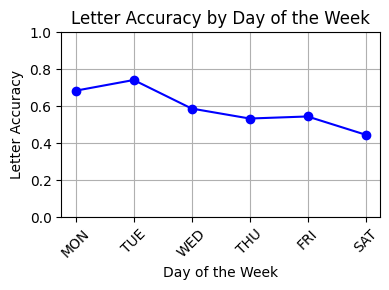

In [101]:
day_order = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
letter_accuracy_by_day['Day of the Week'] = pd.Categorical(letter_accuracy_by_day['Day of the Week'], categories=day_order, ordered=True)
letter_accuracy_by_day = letter_accuracy_by_day.sort_values('Day of the Week')

plt.figure(figsize=(4, 3))
plt.plot(letter_accuracy_by_day['Day of the Week'], letter_accuracy_by_day['Letter'], marker='o', linestyle='-', color='b')

plt.title('Letter Accuracy by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Letter Accuracy')

plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(0, 1) 
plt.tight_layout()

plt.show()

/var/folders/5p/qm9jj2t139v7fn3rlx9z4nb80000gn/T/ipykernel_68153/397477369.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


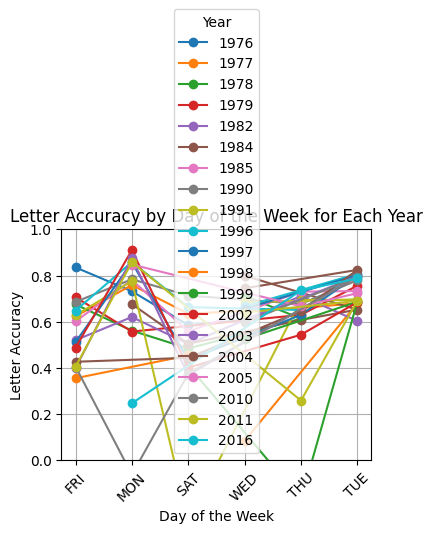

In [99]:
letter_accuracy_by_year_day = accuracies_df.groupby(['Year', 'Day of the Week'])['Letter'].mean().reset_index()
letter_accuracy_by_year_day = letter_accuracy_by_year_day.sort_values(['Year', 'Day of the Week'])

plt.figure(figsize=(4, 3))

years = letter_accuracy_by_year_day['Year'].unique()

for year in years:
    year_data = letter_accuracy_by_year_day[letter_accuracy_by_year_day['Year'] == year]
    plt.plot(year_data['Day of the Week'], year_data['Letter'], marker='o', linestyle='-', label=str(year))

plt.title('Letter Accuracy by Day of the Week for Each Year')
plt.xlabel('Day of the Week')
plt.ylabel('Letter Accuracy')

plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(title='Year')
plt.tight_layout()

plt.show()

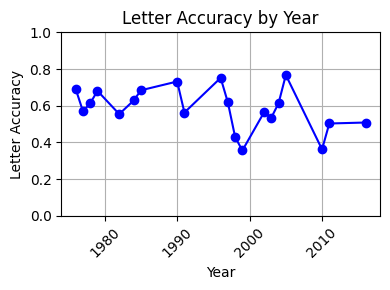

In [100]:
letter_accuracy_by_year = accuracies_df.groupby('Year')['Letter'].mean().reset_index()

letter_accuracy_by_year = letter_accuracy_by_year.sort_values('Year')

plt.figure(figsize=(4, 3))

plt.plot(letter_accuracy_by_year['Year'], letter_accuracy_by_year['Letter'], marker='o', linestyle='-', color='b')

plt.title('Letter Accuracy by Year')
plt.xlabel('Year')
plt.ylabel('Letter Accuracy')

plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(0, 1) 
plt.tight_layout()

plt.show()

In [110]:
word_accuracy_sum = sum(accuracies_df['Word']) 

In [113]:
print((word_accuracy_sum + 6) / 194)

0.4327198124890089


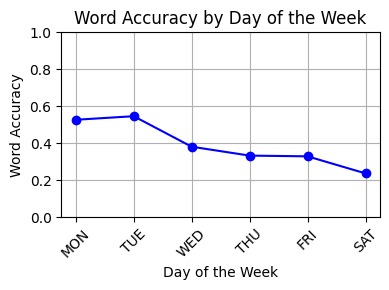

In [117]:
word_accuracy_by_day = accuracies_df.groupby('Day of the Week')['Word'].mean().reset_index()

day_order = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
word_accuracy_by_day['Day of the Week'] = pd.Categorical(word_accuracy_by_day['Day of the Week'], categories=day_order, ordered=True)
word_accuracy_by_day = word_accuracy_by_day.sort_values('Day of the Week')

plt.figure(figsize=(4, 3))
plt.plot(word_accuracy_by_day['Day of the Week'], word_accuracy_by_day['Word'], marker='o', linestyle='-', color='b')

plt.title('Word Accuracy by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Word Accuracy')

plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(0, 1)  
plt.tight_layout()

plt.show()

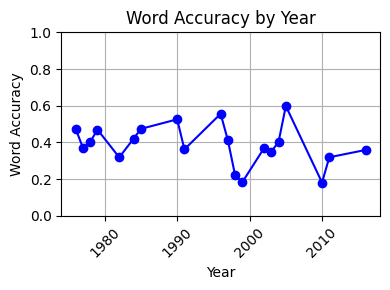

In [118]:
word_accuracy_by_year = accuracies_df.groupby('Year')['Word'].mean().reset_index()

word_accuracy_by_year = word_accuracy_by_year.sort_values('Year')

plt.figure(figsize=(4, 3))

plt.plot(word_accuracy_by_year['Year'], word_accuracy_by_year['Word'], marker='o', linestyle='-', color='b')

plt.title('Word Accuracy by Year')
plt.xlabel('Year')
plt.ylabel('Word Accuracy')

plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(0, 1)  
plt.tight_layout()

plt.show()

In [136]:
accuracies_df.head(10)

,Year,Day of the Week,Filepath,Letter,Word,PredictionPairs
0,1977,FRI,1977/10/14.json,0.673797,0.434211,"[('HITS', 'CIUM'), ('CISCO', 'CISRO'), ('ATTU'..."
1,1991,WED,1991/11/13.json,0.761905,0.525641,"[('ADAM', 'ADAO'), ('ALAS', 'ALAS'), ('ASSAD',..."
2,1977,THU,1977/03/24.json,0.712042,0.473684,"[('ADAM', 'ADAM'), ('PRESS', 'REASS'), ('MAST'..."
3,1991,FRI,1991/03/15.json,0.632432,0.378378,"[('BAGS', 'BOOT'), ('OPAL', 'OPAL'), ('TAVI', ..."
4,1997,WED,1997/03/26.json,0.748663,0.564103,"[('SALAD', 'SALAC'), ('COLE', 'COLE'), ('PAP',..."
5,2004,WED,2004/11/17.json,0.770053,0.512821,"[('WISH', 'WISH'), ('SCAMP', 'SCALA'), ('NCAA'..."
6,1999,TUE,1999/04/20.json,0.670270,0.461538,"[('GARB', 'SARO'), ('AWES', 'AWES'), ('YALTA',..."
7,2003,MON,2003/10/13.json,0.919786,0.769231,"[('SCAR', 'SCAR'), ('ACAD', 'ACAD'), ('BABAR',..."
8,2010,SAT,2010/06/12.json,0.409326,0.151515,"[('BEEFEATERS', 'AAEAEATEES'), ('FIRE', 'AYFM'..."
9,1990,SAT,1990/01/13.json,0.551020,0.283784,"[('PARADIDDLE', 'PSEADIRTAN'), ('CRIS', 'SFPS'..."


In [166]:
bad_performers_df = accuracies_df[accuracies_df['Letter'] <= 0.29]
bad_performers_df.head(17)
# sat_2003 = bad_performers_df.iloc[0]
# sat_2003['PredictionPairs']


,Year,Day of the Week,Filepath,Letter,Word,PredictionPairs
76,2003,SAT,2003/03/22.json,0.287879,0.111111,"[('SHORTFUSE', 'NSCAKDULI'), ('ROMPS', 'ROUTS'..."
167,2003,FRI,2003/04/18.json,0.283505,0.117647,"[('POLS', 'RRFS'), ('SCRAPPAPER', 'TCNEABKQET'..."


In [159]:
file_path = "2003/03/22.json"
if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
        print(data)
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("File does not exist or is empty.")


File does not exist or is empty.


In [163]:
filepath = "2003/03/22.json"
file_path = os.path.join("/Users/ishan/Downloads/nyt_crosswords-master", file_name)
with open(file_path, 'r') as file:
    data = json.load(file)
print(data)

{'acrossmap': None, 'admin': False, 'answers': {'across': ['SHORTFUSE', 'ROMPS', 'NOBRAINER', 'SNOUT', 'OUTSMARTS', 'VERSA', 'OSU', 'STEP', 'APATHY', 'ZEST', 'SALESSLIPS', 'EDENS', 'LAPS', 'SCUM', 'UNS', 'NEUT', 'ILA', 'CONTACT', 'EMERALD', 'ONA', 'GROG', 'ERE', 'RAVE', 'ERAS', 'ATTIC', 'ASYMMETRIC', 'DANL', 'LLBEAN', 'DELI', 'INA', 'SALEM', 'DEVELOPER', 'ENURE', 'SNEAKPEEK', 'ATEST', 'CASTASIDE'], 'down': ['SNOOZE', 'HOUSED', 'OBTUSE', 'RRS', 'TAMS', 'FIATS', 'UNREAL', 'SETPLAN', 'ERS', 'RSVPS', 'ONEALS', 'MORTICIA', 'PUSHPULL', 'STAYSMAD', 'ASSUME', 'TNUT', 'EPEE', 'SNAG', 'SCREEN', 'TERA', 'CORALSEA', 'ONASLANT', 'NAVYBLUE', 'TORT', 'RETD', 'GARDENA', 'EMEERS', 'SIEVES', 'TAIPEI', 'INNEED', 'CLARKE', 'MAMET', 'CLEAT', 'ILKA', 'DSC', 'OPS']}, 'author': 'Rich Norris', 'autowrap': None, 'bbars': None, 'circles': None, 'clues': {'across': ['1. Temper', '10. Hardly close contests', "15. It's obvious", '16. Muzzle', '17. Tricks', '18. Literally, "turned"', '19. Big Ten sch.', '20. Help on

In [165]:
bad_performers_df = accuracies_df[accuracies_df['Letter'] <= 0.29]
bad_performers_df.head(17)
sat_2003 = bad_performers_df.iloc[0]
sat_2003['PredictionPairs']

"[('SHORTFUSE', 'NSCAKDULI'), ('ROMPS', 'ROUTS'), ('NOBRAINER', 'OAATIINAC'), ('SNOUT', 'NOSEE'), ('OUTSMARTS', 'DFNHLCRYS'), ('VERSA', 'SINCE'), ('OSU', 'RED'), ('STEP', 'TTEO'), ('APATHY', 'APATHY'), ('ZEST', 'ISIL'), ('SALESSLIPS', 'AAUFSLAAAS'), ('EDENS', 'FTDAN'), ('LAPS', 'LTAS'), ('SCUM', 'TAGR'), ('UNS', 'TAC'), ('NEUT', 'XNUK'), ('ILA', 'ILA'), ('CONTACT', 'CWLCION'), ('EMERALD', 'ZMITAAR'), ('ONA', 'OEE'), ('GROG', 'LNEN'), ('ERE', 'ELR'), ('RAVE', 'RIAS'), ('ERAS', 'CEOC'), ('ATTIC', 'CANTE'), ('ASYMMETRIC', 'AGTUMEDROL'), ('DANL', 'DANL'), ('LLBEAN', 'LHHLAA'), ('DELI', 'WLES'), ('INA', 'IRE'), ('SALEM', 'STETM'), ('DEVELOPER', 'DAOAAOAAR'), ('ENURE', 'EERAE'), ('SNEAKPEEK', 'SLNSMPRAK'), ('ATEST', 'ADSNT'), ('CASTASIDE', 'MKSHMSOAE'), ('SNOOZE', 'NODRIF'), ('HOUSED', 'SAFEST'), ('OBTUSE', 'CANDID'), ('RRS', 'ATH'), ('TAMS', 'KILT'), ('FIATS', 'DICTA'), ('UNREAL', 'UNREAL'), ('SETPLAN', 'LAYOUTX'), ('ERS', 'ICS'), ('RSVPS', 'RNSPL'), ('ONEALS', 'OOIAAT'), ('MORTICIA', 'USNT